# Introduction

This Notebook provides an example of Training a Neural Network Model By Scratch. 


In [1]:
# Import Necessary Packages
import matplotlib.pyplot as plt
from PreProcessingToolKit import pptk
from GenerateCCData import CCData
from NNFS import NNFS

## Table Of Contents

### [Data Generation](#subsection-1)

The Data that will be generated and will be of layered concentric circles.

### [Preprocessing](#subsection-2)

The Data will be preprocessed and the Model Architecture will be created.

### [Defining Model Architecture, Training and Evaluation](#subsection-3)

Model will be trained utilizing the Model Architecture that has been set and the Model will be evaluated.

### [Conclusion](#conclusion)

Limitations of the Model and the Data Generation will be explained.

### <a id='subsection-1'>Data Generation</a>

In [2]:
# Parameters to Generate Concentric Circles Data

no_circles = 5 # No of Concentric Circles. Overall Classes will be no_circles+1
category_size= 2 # Size of Each Concentric Circle
data_per_category = 2000 # Number of Data points for Each Concentric Circle

In [3]:
Generator_circlesX_data = CCData(no_circles,category_size,data_per_category)
circlesX , labels = Generator_circlesX_data.generate()

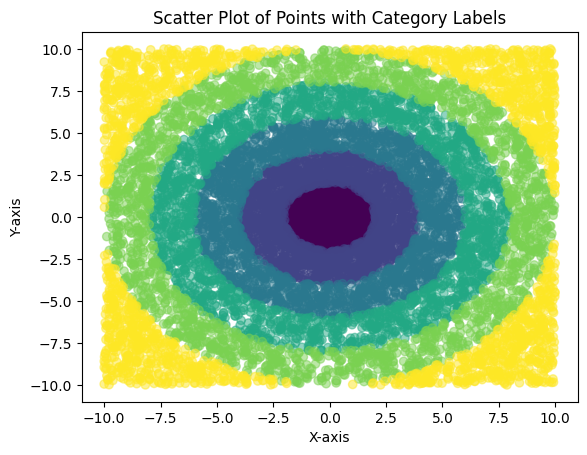

In [4]:
# Scatter plot with colors based on labels
plt.scatter(circlesX[:, 0], circlesX[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.title('Scatter Plot of Points with Category Labels')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()


### <a id='subsection-2'>Preprocessing</a>

In [5]:
home_made_pre_processor = pptk()
circlesX_normalized = home_made_pre_processor.min_max_scaler(circlesX)

In [6]:
X_train, X_test, y_train, y_test = home_made_pre_processor.train_test_split(circlesX_normalized,labels)
y_train_one_hot, y_test_one_hot = home_made_pre_processor.one_hot_encode(no_circles+1,y_train, y_test)

### <a id='subsection-3'>Defining Model Architecture, Training and Evaluation</a>

In [7]:
# Parameters to Pass Into Neural Network Model

hidden_in = 64 # The Input Layer
hidden_out = 32 # The Hidden Layer (Only One Hidden Layer is utilized)
epochs = 50 # Number of Times the Model uses the Entirety of the Training Data to train.
batch_size = 32 # Size of each pass
learning_rate = 0.01 # Learning Rate

In [8]:
input_size = 2
output_size = no_circles+1
nn_tool = NNFS(input_size,hidden_in,hidden_out,output_size,epochs,batch_size,learning_rate)
nn_tool.train(X_train,y_train_one_hot)
print(f' The Test Accuracy was : {round(nn_tool.evaluate(X_test,y_test_one_hot)*100,2)}')
print(f' The Training Data peaks at {round(max(nn_tool.train_accuracies)*100,2)}')

 The Test Accuracy was : 93.21
 The Training Data peaks at 100.0


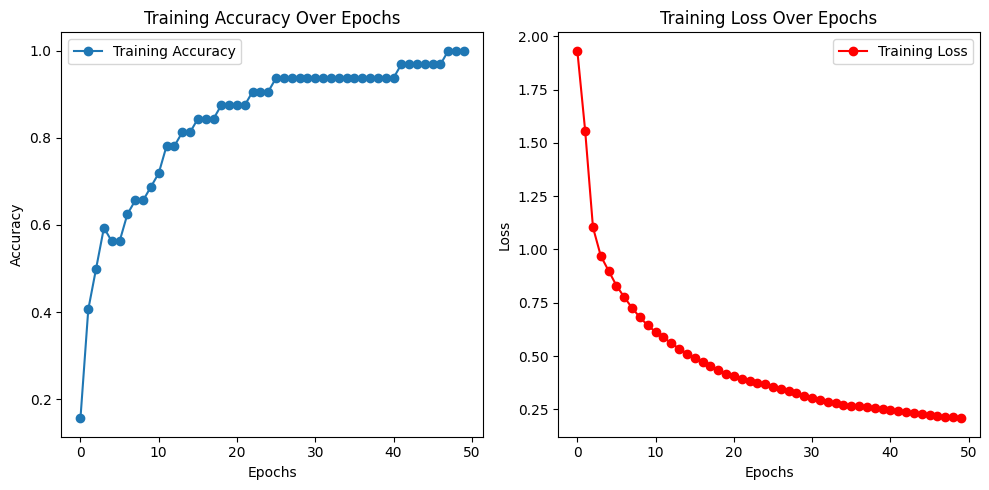

In [9]:
nn_tool.visualize()

### <a id='conclusion'>Conclusion</a>

The Main limitations of this model are:

- In ability to classify data outside the Boundaries.
- When Training, this model does not shuffle the data every epoch. This means that this model is not resistant to order generalization.
- No Validation Data was used to train the model hence the model overfits to the Training Data.  
Even if the Training and Test Data Accuracy is the similiar, some sort of  validation data and if necessary Regularization Techniques in the model should be utilized.